In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
data_demo = pd.read_csv('../out/study4_demo.csv')
data_demo.head()

,bias_0-std_0,bias_0-std_0.5,bias_0-std_1,bias_0-std_2,bias_0-std_4,bias_0-std_8,bias_0.5-std_0,bias_0.5-std_0.5,bias_0.5-std_1,bias_0.5-std_2,...,bias_4-std_2,bias_4-std_4,bias_4-std_8,bias_8-std_0,bias_8-std_0.5,bias_8-std_1,bias_8-std_2,bias_8-std_4,bias_8-std_8,y
0,-0.114415,0.566684,-1.519651,0.967394,5.590371,-10.828131,0.385585,0.122717,-0.756013,-1.801402,...,3.288400,1.870682,-12.755911,7.885585,8.412650,8.237611,7.359528,-1.173297,15.630140,-0.114415
1,-2.566305,-3.233080,-1.307909,-2.529772,-0.583601,10.025690,-2.066305,-1.967775,-0.794796,-4.170529,...,0.965767,1.680960,-0.283122,5.433695,5.362820,3.330835,3.725604,-3.010570,6.906176,-2.566305
2,3.438665,3.405688,3.828250,4.502434,8.407102,-6.879155,3.938665,3.408234,4.843946,4.532493,...,11.102542,8.617631,13.761559,11.438665,11.046285,12.791125,10.579230,1.265772,4.841607,3.438665
3,-2.547176,-1.757138,-3.246251,-2.335597,-2.940060,-5.675874,-2.047176,-1.970858,-0.595925,-0.982516,...,-1.130263,1.795077,2.287468,5.452824,5.529328,5.619043,6.110257,15.224342,8.389342,-2.547176
4,0.081219,-0.328039,0.196101,0.126715,7.444359,3.015958,0.581219,0.828215,-1.387898,1.220183,...,3.536659,2.125049,23.084239,8.081219,7.102027,6.385293,7.594713,9.010862,9.259566,0.081219


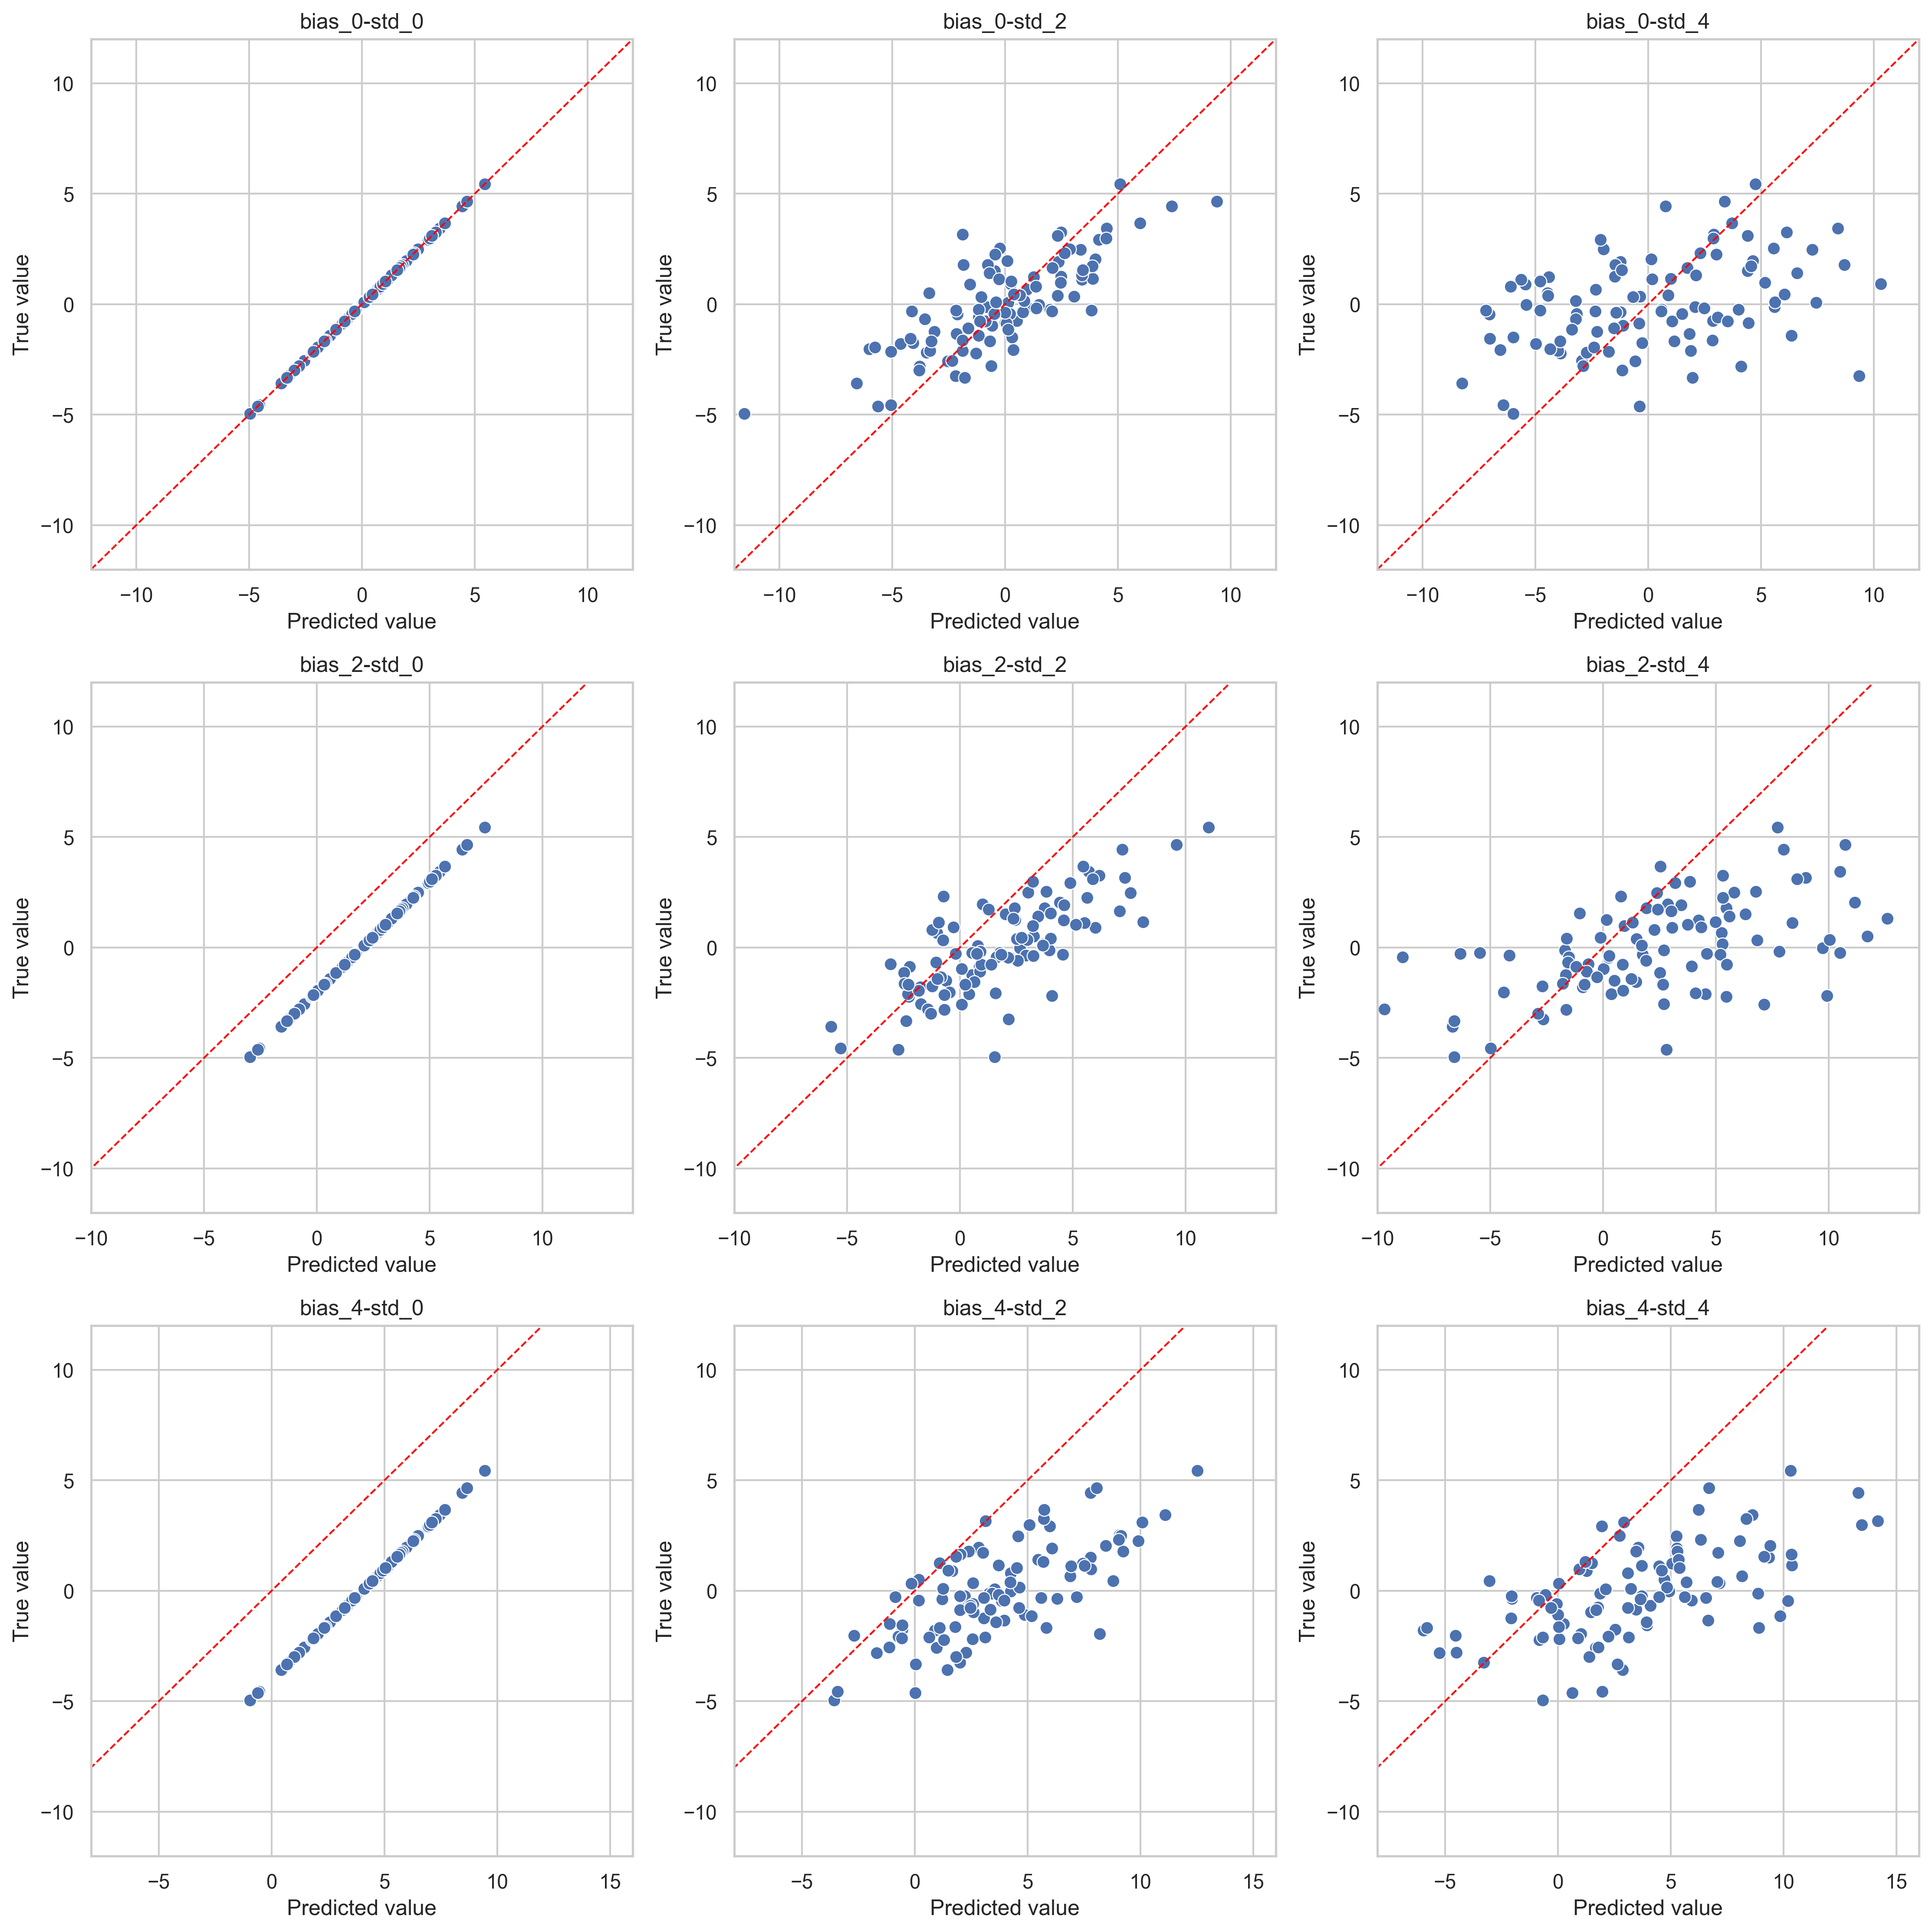

In [37]:
# 3 by 3 subplots
BIAS = [0, 2, 4]
STD = [0, 2, 4]
nlim = 12; plim = nlim
sns.set(style="whitegrid")
n_subplots = len(BIAS)
fig, axes = plt.subplots(n_subplots, n_subplots, figsize=(15, 15), dpi=300)
for i, b in enumerate(BIAS):
    for j, s in enumerate(STD):
        name = f'bias_{b}-std_{s}'
        # set range
        axes[i, j].set_xlim(-nlim + BIAS[i], plim + BIAS[i])
        axes[i, j].set_ylim(-nlim, plim)
        # perfect prediction line
        axes[i, j].plot([-nlim, plim], [-nlim, plim], color='red', 
                        linewidth=1, linestyle='--')
        # scatter plots
        sns.scatterplot(x=name, y="y", data=data_demo, ax=axes[i, j], s=50)
        axes[i, j].set_title(name)
        axes[i, j].set_xlabel('Predicted value')
        axes[i, j].set_ylabel('True value')
# save
plt.tight_layout()
plt.savefig('../out/study4_demo.png', dpi=300)        

In [47]:
data = pd.read_csv('../out/study4.csv')
BIAS = data["bias"].unique()
STD = data["std"].unique()
n_subplots = len(BIAS) 
data.head()

,trial,CCC,MAE,R2,RMSE,RMSPE,RSR,r,r2,bias,std
0,bias_0-std_0,1.000100,0.000000,1.000000,0.000000,0.000000,0.000000,1.000100,1.000200,0.0,0.0
1,bias_0-std_0.5,0.969790,0.398866,0.937485,0.499854,110.317566,0.250018,0.970243,0.941373,0.0,0.5
2,bias_0-std_1,0.888879,0.797886,0.749743,1.000101,196.086615,0.500233,0.894443,0.800032,0.0,1.0
3,bias_0-std_2,0.666608,1.595882,-0.001006,2.000167,413.503125,1.000451,0.707166,0.500110,0.0,2.0
4,bias_0-std_4,0.333644,3.191295,-3.001964,3.999301,994.509552,2.000388,0.447781,0.200574,0.0,4.0


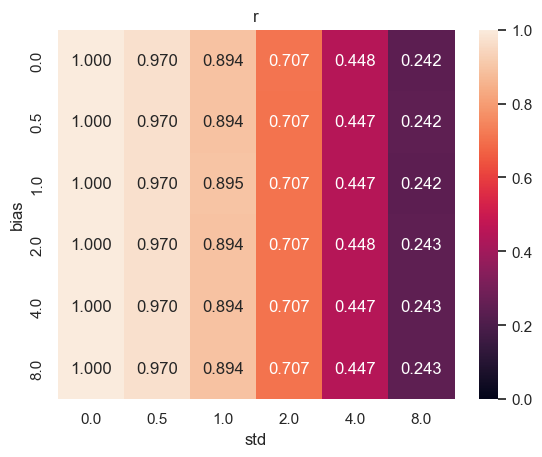

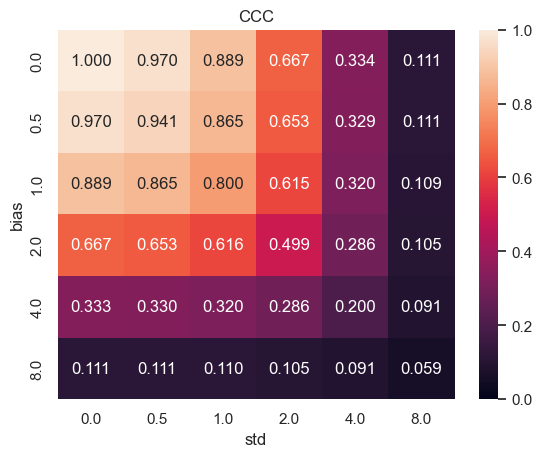

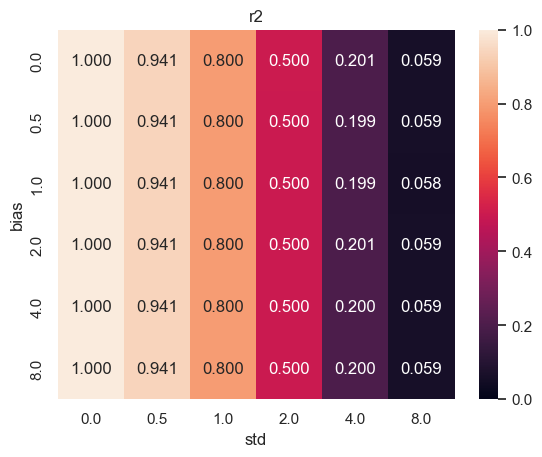

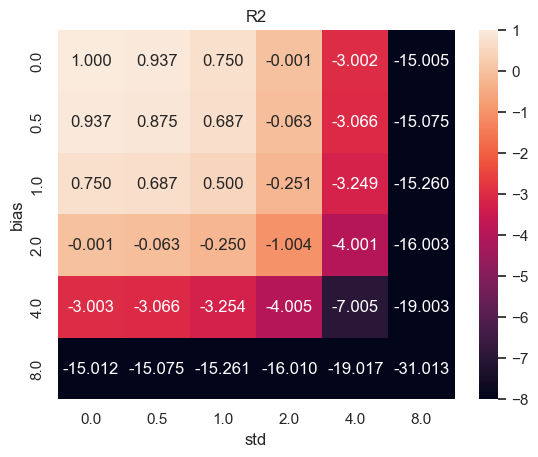

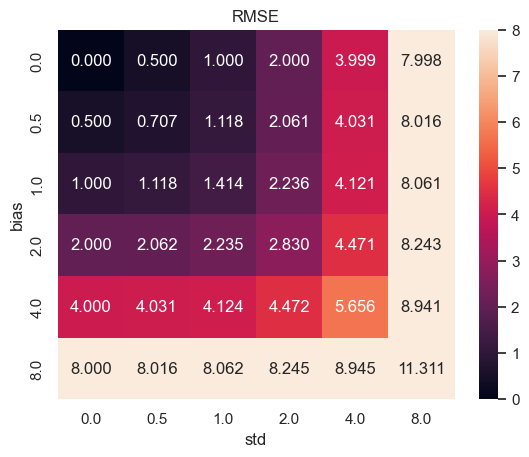

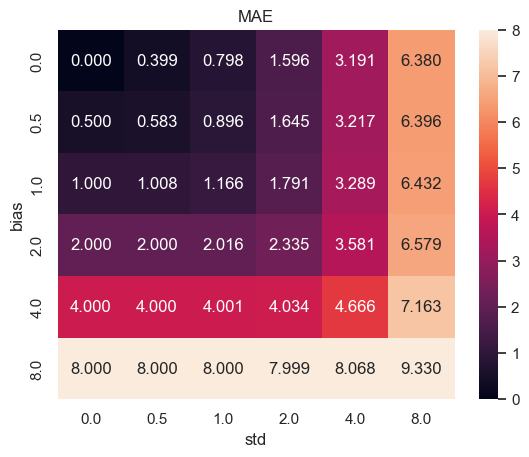

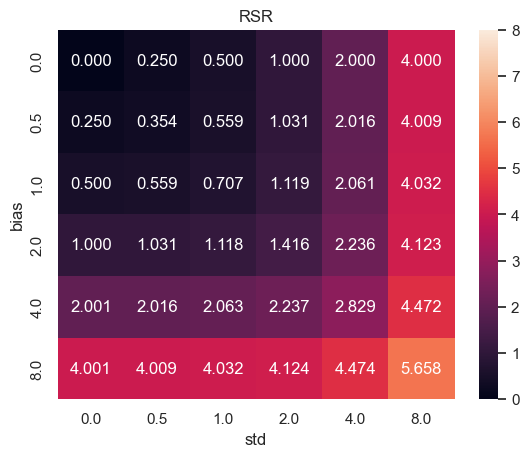

In [68]:
for col in ["r", "CCC", "r2", "R2", "RMSE", "MAE", "RSR"]:
    if col in ["r", "CCC", "r2"]:
        vmax = 1; vmin = 0
    elif col in ["RMSE", "MAE", "RSR"]:
        vmax = 8; vmin = 0
    elif col == "R2":
        vmax = 1; vmin = -8
    sns.heatmap(data.loc[:, col].values.reshape(n_subplots, n_subplots), annot=True, 
                fmt=".3f", xticklabels=STD, yticklabels=BIAS,
                vmin=vmin, vmax=vmax)
    plt.title(col)
    plt.xlabel("std")
    plt.ylabel("bias")
    plt.savefig(f'../out/study4_{col}.png', dpi=300)
    plt.show()
    plt.close()